In [3]:
import os
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shashankpenumaka","key":"{{{{API KEY }}}}"}'}

In [9]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [10]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia
!unzip chest-xray-pneumonia.zip -d /content

Streaming output truncated to the last 5000 lines.
  inflating: /content/chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: /content/chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: /content/chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: /content/chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: /content/chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: /content/chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: /content/chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: /content/chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: /content/chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: /content/chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: /content/chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: /content/chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: /content/chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: /content/chest_xray/train/NORMAL/IM-0445-0001.jpeg  


In [11]:
train_dir = '/content/chest_xray/train'
val_dir = '/content/chest_xray/val'
test_dir = '/content/chest_xray/test'

In [12]:
train_gen = ImageDataGenerator(rescale=1./255,
                               rotation_range=20,
                               shear_range=0.2,
                               zoom_range=0.2,
                               horizontal_flip=True)

val_gen = ImageDataGenerator(rescale=1./255)
test_gen = ImageDataGenerator(rescale=1./255)

train_data = train_gen.flow_from_directory(train_dir,
                                           target_size=(150, 150),
                                           batch_size=32,
                                           class_mode='binary')

val_data = val_gen.flow_from_directory(val_dir,
                                       target_size=(150, 150),
                                       batch_size=32,
                                       class_mode='binary')

test_data = test_gen.flow_from_directory(test_dir,
                                         target_size=(150, 150),
                                         batch_size=32,
                                         class_mode='binary',
                                         shuffle=False)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [13]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [15]:
history = model.fit(train_data,
                    epochs=10,
                    validation_data=val_data)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 337s 2s/step - accuracy: 0.7690 - loss: 0.5582 - val_accuracy: 0.7500 - val_loss: 0.4793
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 346s 2s/step - accuracy: 0.8815 - loss: 0.2849 - val_accuracy: 0.6875 - val_loss: 0.7733
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 336s 2s/step - accuracy: 0.8829 - loss: 0.2781 - val_accuracy: 0.6250 - val_loss: 1.1782
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 334s 2s/step - accuracy: 0.9220 - loss: 0.2072 - val_accuracy: 0.6250 - val_loss: 0.7127
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 387s 2s/step - accuracy: 0.9158 - loss: 0.2259 - val_accuracy: 0.6250 - val_loss: 0.8098
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 373s 2s/step - accuracy: 0.9268 - loss: 0.1789 - val_accuracy: 0.6875 - val_loss: 0.8284
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 344s 2s/step - accuracy: 0.9381 - loss: 0.1619 - val_accuracy: 0.6250 - val_loss: 1.5270
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 327s 2s/step - accuracy: 0.9411 - loss: 0.1508 - val_accu

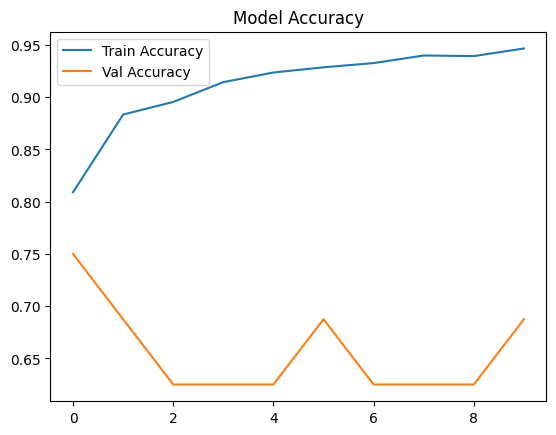

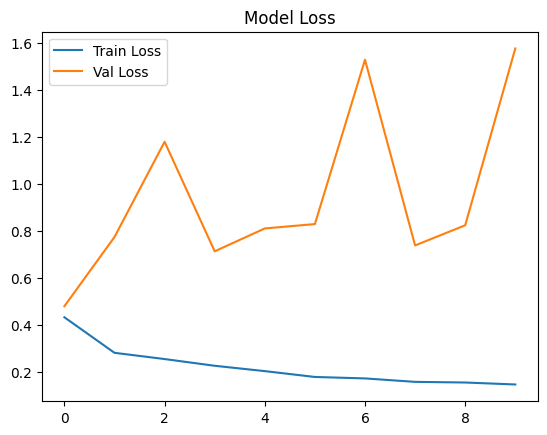

In [16]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Model Accuracy")
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Model Loss")
plt.show()

In [17]:
test_loss, test_acc = model.evaluate(test_data)
print("Test Accuracy:", test_acc)

20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 699ms/step - accuracy: 0.8258 - loss: 0.6494
Test Accuracy: 0.8878205418586731


20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 661ms/step
              precision    recall  f1-score   support

      NORMAL       0.97      0.72      0.83       234
   PNEUMONIA       0.86      0.99      0.92       390

    accuracy                           0.89       624
   macro avg       0.91      0.85      0.87       624
weighted avg       0.90      0.89      0.88       624



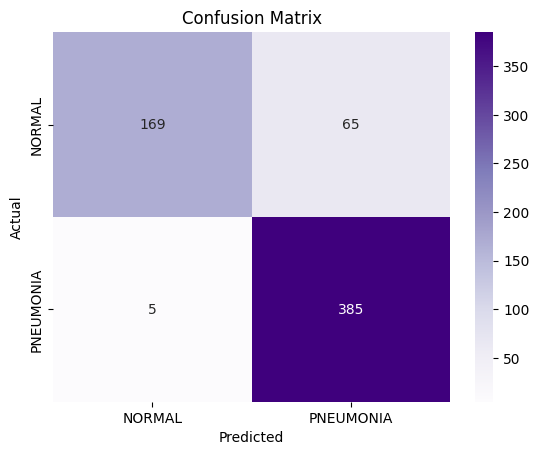

In [18]:
y_pred = model.predict(test_data)
y_pred = (y_pred > 0.5).astype(int)
y_true = test_data.classes

print(classification_report(y_true, y_pred, target_names=['NORMAL', 'PNEUMONIA']))

cm = confusion_matrix(y_true, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=['NORMAL', 'PNEUMONIA'], yticklabels=['NORMAL', 'PNEUMONIA'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


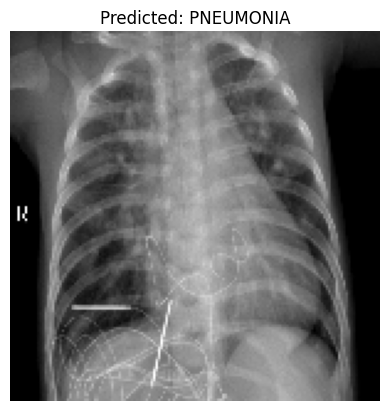

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


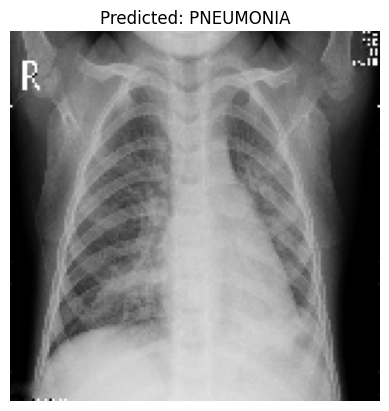

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


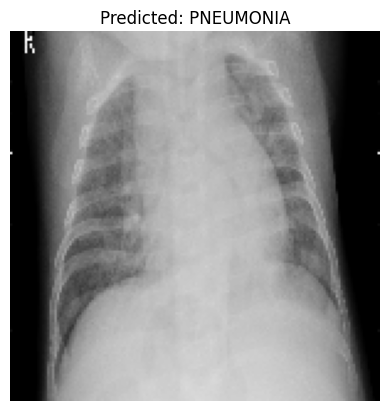

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


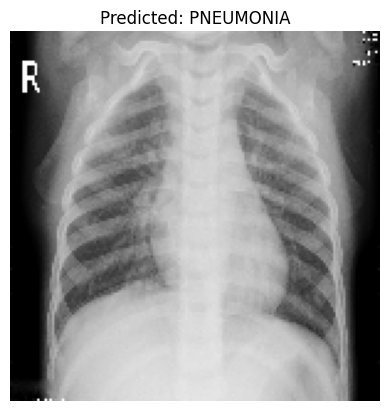

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


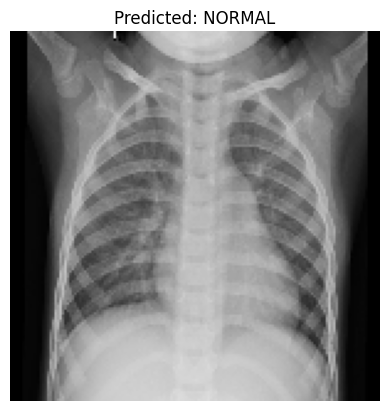

In [20]:
import random
from tensorflow.keras.utils import load_img, img_to_array

sample_paths = test_data.filepaths
samples = random.sample(range(len(sample_paths)), 5)

for i in samples:
    img_path = sample_paths[i]
    img = load_img(img_path, target_size=(150,150))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    pred = model.predict(img_array)[0][0]
    label = "PNEUMONIA" if pred > 0.5 else "NORMAL"

    plt.imshow(img)
    plt.title(f"Predicted: {label}")
    plt.axis('off')
    plt.show()